## Infrastructure  Stock Analysis

### ADANIPORTS

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

#### Loading Desired Data from Yahoo Finance.

In [9]:
adaniports = yf.download('ADANIPORTS.NS', start="2019-01-01", end="2023-12-30")
adaniports.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,386.299988,390.899994,384.049988,389.000000,376.710571,1233249
2019-01-02,388.000000,388.950012,378.000000,381.299988,369.253784,1506543
2019-01-03,382.399994,385.299988,376.600006,378.100006,366.154938,1902063
2019-01-04,378.649994,383.950012,375.850006,382.149994,370.076935,1669709
2019-01-07,385.000000,386.950012,379.350006,381.649994,369.592773,1260331


#### Cleaning Process

In [10]:
adaniports.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [11]:
adaniports.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,597.929799,606.865710,587.593723,596.853401,588.399680,7.251683e+06
std,206.668003,209.489599,203.590808,205.964269,207.269470,9.243398e+06
min,216.000000,235.800003,203.000000,207.800003,203.566116,0.000000e+00
25%,376.550003,380.225006,370.349991,374.325012,362.956360,2.866816e+06
50%,684.599976,694.150024,670.599976,683.849976,675.806702,4.607499e+06
75%,757.775024,768.750000,745.750000,758.375000,747.912994,7.916322e+06
max,1095.000000,1102.400024,1072.750000,1094.300049,1094.300049,1.155175e+08


In [12]:
adaniports.rename(columns={"Adj Close": "price_t"}, inplace=True)
adaniports.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,386.299988,390.899994,384.049988,389.000000,376.710571,1233249
2019-01-02,388.000000,388.950012,378.000000,381.299988,369.253784,1506543
2019-01-03,382.399994,385.299988,376.600006,378.100006,366.154938,1902063
2019-01-04,378.649994,383.950012,375.850006,382.149994,370.076935,1669709
2019-01-07,385.000000,386.950012,379.350006,381.649994,369.592773,1260331


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [13]:
adaniports['daily_returns']=adaniports["price_t"].pct_change()
adaniports

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,386.299988,390.899994,384.049988,389.000000,376.710571,1233249,NaN
2019-01-02,388.000000,388.950012,378.000000,381.299988,369.253784,1506543,-0.019794
2019-01-03,382.399994,385.299988,376.600006,378.100006,366.154938,1902063,-0.008392
2019-01-04,378.649994,383.950012,375.850006,382.149994,370.076935,1669709,0.010711
2019-01-07,385.000000,386.950012,379.350006,381.649994,369.592773,1260331,-0.001308
...,...,...,...,...,...,...,...
2023-12-22,1034.000000,1050.949951,1019.000000,1027.500000,1027.500000,5252106,0.008391
2023-12-26,1034.099976,1041.000000,1026.099976,1028.750000,1028.750000,2176775,0.001217
2023-12-27,1037.000000,1037.050049,1018.000000,1024.400024,1024.400024,2803997,-0.004228


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

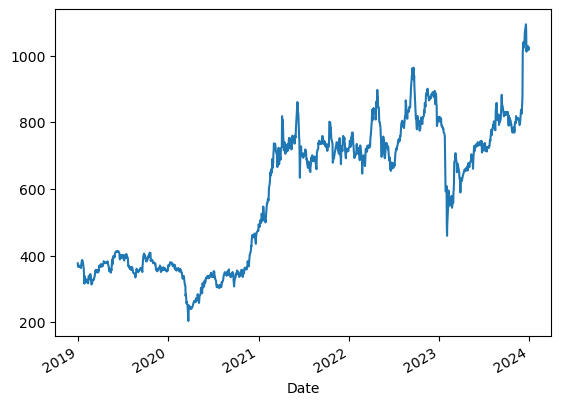

In [14]:
adaniports['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

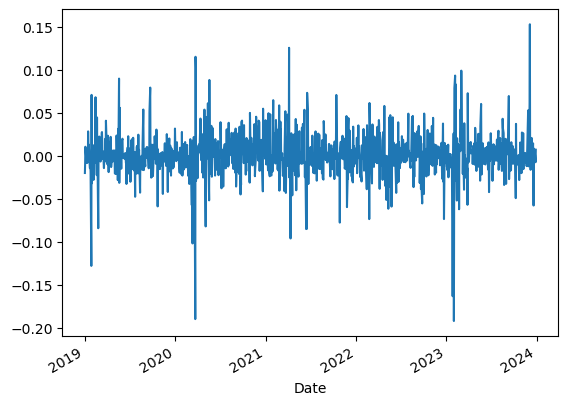

In [21]:
adaniports['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of ADANIPORTS is in the downtrend in early 2020 & 2023 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

In [27]:
adaniports['mov_avg'] = adaniports['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

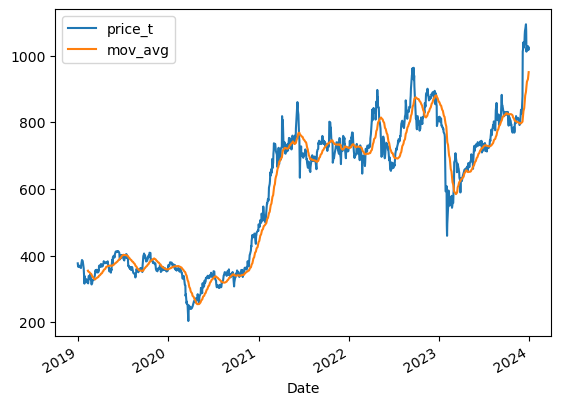

In [28]:
adaniports[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [29]:
adaniports['Log_Ret'] = np.log(adaniports['price_t'] / adaniports['price_t'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
adaniports['volatility'] = adaniports['Log_Ret'].rolling(window=30).std() * np.sqrt(30)


<Axes: xlabel='Date'>

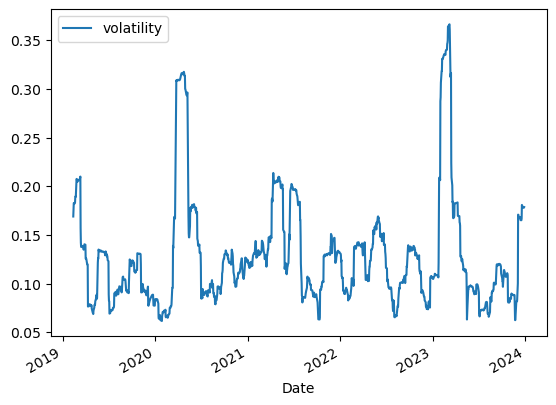

In [30]:
adaniports[['volatility']].plot()

## R SI (30 - Day)

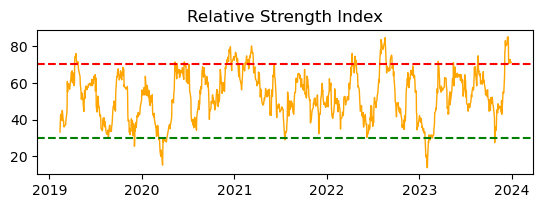

In [26]:
change = adaniports["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

### GMRINFRA.NS

#### Loading Desired Data from Yahoo Finance.

In [2]:
gmrinfra = yf.download('GMRINFRA.NS', start="2019-01-01", end="2023-12-30")
gmrinfra.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,16.50,16.549999,16.25,16.40,16.40,5340382
2019-01-02,16.40,16.450001,15.85,15.95,15.95,9110731
2019-01-03,15.95,16.100000,15.60,15.65,15.65,11069953
2019-01-04,15.70,15.950000,15.40,15.85,15.85,10132029
2019-01-07,16.00,16.150000,15.70,15.85,15.85,6373303


In [3]:
gmrinfra.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
gmrinfra.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,31.591457,32.184858,31.018421,31.582348,31.582348,1.797045e+07
std,13.036923,13.268730,12.835930,13.058398,13.058398,2.288039e+07
min,14.400000,14.750000,12.950000,14.450000,14.450000,0.000000e+00
25%,21.000000,21.400000,20.600000,20.925000,20.925000,7.764491e+06
50%,28.600000,29.100000,27.799999,28.650000,28.650000,1.210483e+07
75%,40.000000,40.750000,39.349998,39.900002,39.900002,2.032548e+07
max,78.349998,81.500000,76.400002,80.550003,80.550003,4.872196e+08


In [5]:
gmrinfra.rename(columns={"Adj Close": "price_t"}, inplace=True)
gmrinfra.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,16.50,16.549999,16.25,16.40,16.40,5340382
2019-01-02,16.40,16.450001,15.85,15.95,15.95,9110731
2019-01-03,15.95,16.100000,15.60,15.65,15.65,11069953
2019-01-04,15.70,15.950000,15.40,15.85,15.85,10132029
2019-01-07,16.00,16.150000,15.70,15.85,15.85,6373303


#### Calculate Daily Returns.

In [6]:
gmrinfra['daily_returns']=gmrinfra["price_t"].pct_change()
gmrinfra

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,16.500000,16.549999,16.250000,16.400000,16.400000,5340382,NaN
2019-01-02,16.400000,16.450001,15.850000,15.950000,15.950000,9110731,-0.027439
2019-01-03,15.950000,16.100000,15.600000,15.650000,15.650000,11069953,-0.018809
2019-01-04,15.700000,15.950000,15.400000,15.850000,15.850000,10132029,0.012780
2019-01-07,16.000000,16.150000,15.700000,15.850000,15.850000,6373303,0.000000
...,...,...,...,...,...,...,...
2023-12-22,75.300003,77.800003,73.699997,74.650002,74.650002,27907280,0.017030
2023-12-26,75.050003,75.599998,73.650002,73.949997,73.949997,13691736,-0.009377
2023-12-27,74.150002,75.000000,73.099998,73.300003,73.300003,13530197,-0.008790


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

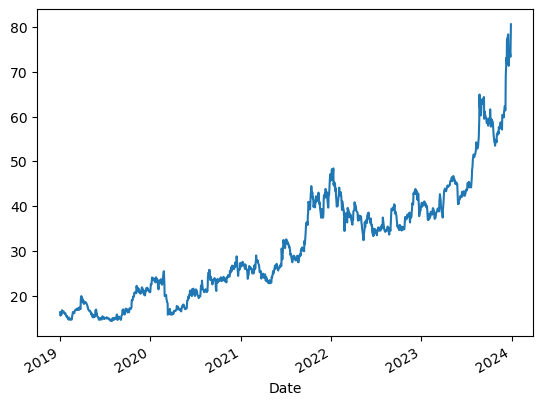

In [7]:
gmrinfra['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

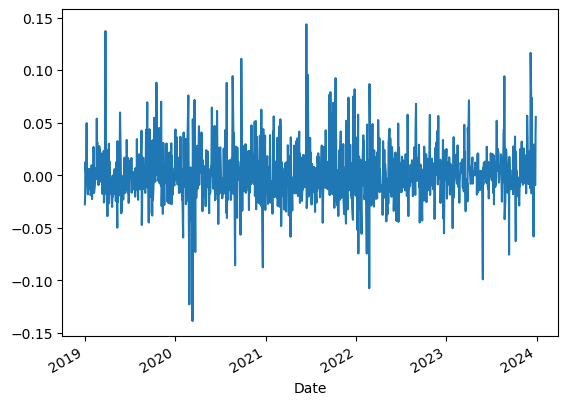

In [8]:
gmrinfra['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of GMRINFRA is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average (30-day)

In [9]:
gmrinfra['mov_avg'] = gmrinfra['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

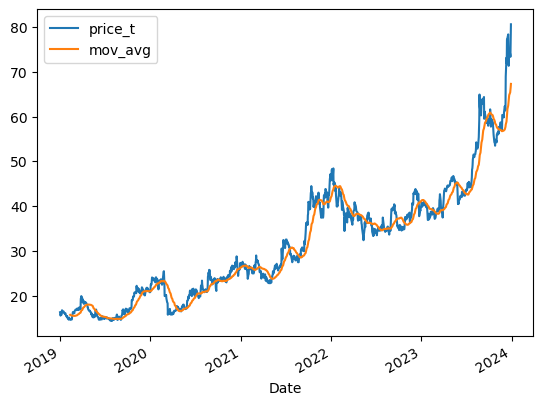

In [10]:
gmrinfra[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [11]:
gmrinfra['Log_Ret'] = np.log(gmrinfra['price_t'] / gmrinfra['price_t'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
gmrinfra['volatility'] = gmrinfra['Log_Ret'].rolling(window=30).std() * np.sqrt(30)


<Axes: xlabel='Date'>

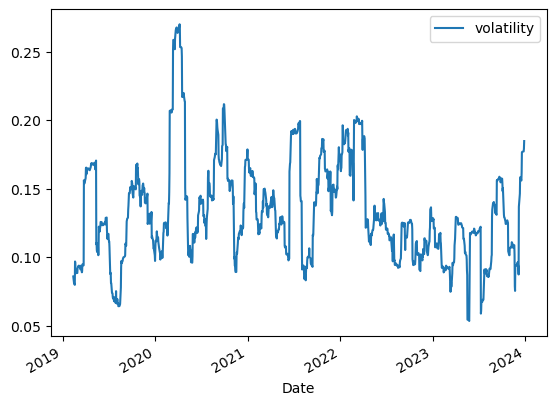

In [12]:
gmrinfra[['volatility']].plot()

### R SI (30-Day)

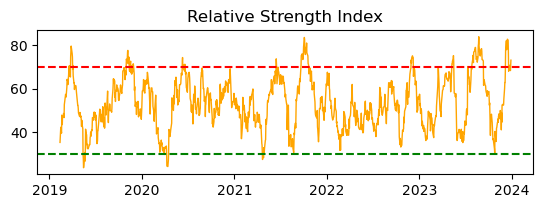

In [43]:
change = gmrinfra["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

 ### IRB.NS

#### Loading Desired Data from Yahoo Finance.

In [15]:
irb = yf.download('IRB.NS', start="2019-01-01", end="2023-12-30")
irb.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,16.514999,16.549999,16.264999,16.485001,15.626102,8805170
2019-01-02,16.405001,16.504999,15.765000,15.905000,15.076321,15660460
2019-01-03,15.905000,16.030001,15.520000,15.620000,14.806170,8658850
2019-01-04,15.620000,15.940000,15.435000,15.805000,14.981533,11690530
2019-01-07,15.965000,16.049999,15.655000,15.800000,14.976792,7157980


#### Cleaning Process.

In [16]:
irb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [17]:
irb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,18.007389,18.408907,17.604534,17.962239,17.703518,2.532662e+07
std,8.617012,8.777581,8.454099,8.596143,8.688676,3.679240e+07
min,4.560000,5.010000,4.560000,4.770000,4.521474,0.000000e+00
25%,10.942500,11.150000,10.727500,10.902500,10.732420,8.163320e+06
50%,15.955000,16.299999,15.550000,15.905000,15.596397,1.417232e+07
75%,25.105000,25.589999,24.665000,25.072500,24.864413,2.780262e+07
max,42.750000,43.500000,41.650002,42.450001,42.450001,4.275172e+08


In [18]:
irb.rename(columns={"Adj Close": "price_t"}, inplace=True)
irb.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,16.514999,16.549999,16.264999,16.485001,15.626102,8805170
2019-01-02,16.405001,16.504999,15.765000,15.905000,15.076321,15660460
2019-01-03,15.905000,16.030001,15.520000,15.620000,14.806170,8658850
2019-01-04,15.620000,15.940000,15.435000,15.805000,14.981533,11690530
2019-01-07,15.965000,16.049999,15.655000,15.800000,14.976792,7157980


#### Calculate daily returns.

In [19]:
irb['daily_returns']=irb["price_t"].pct_change()
irb

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,16.514999,16.549999,16.264999,16.485001,15.626102,8805170,NaN
2019-01-02,16.405001,16.504999,15.765000,15.905000,15.076321,15660460,-0.035184
2019-01-03,15.905000,16.030001,15.520000,15.620000,14.806170,8658850,-0.017919
2019-01-04,15.620000,15.940000,15.435000,15.805000,14.981533,11690530,0.011844
2019-01-07,15.965000,16.049999,15.655000,15.800000,14.976792,7157980,-0.000316
...,...,...,...,...,...,...,...
2023-12-22,42.000000,42.650002,41.099998,41.650002,41.650002,28375867,0.002407
2023-12-26,41.849998,42.250000,41.299999,41.849998,41.849998,12750085,0.004802
2023-12-27,42.049999,42.099998,40.849998,41.750000,41.750000,16119184,-0.002389


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

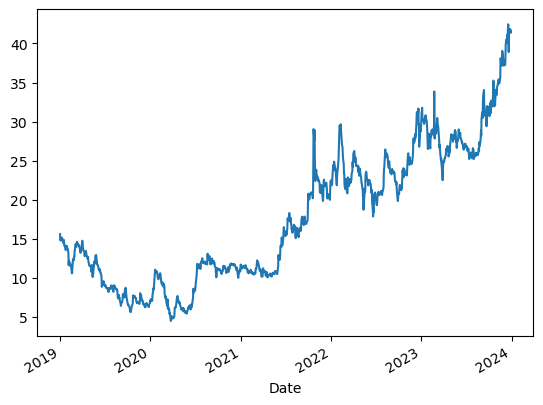

In [20]:
irb['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

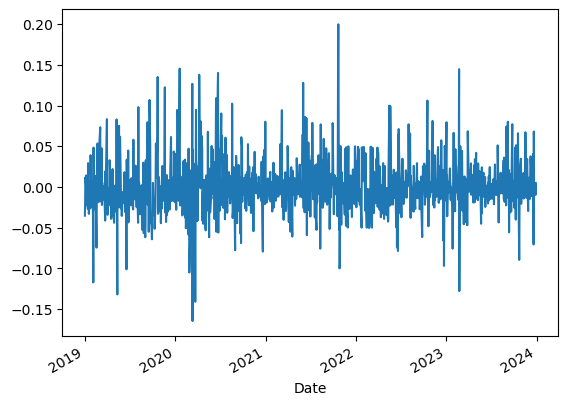

In [21]:
irb['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of IRB is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average (30-day)

In [22]:
irb['mov_avg'] = irb['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

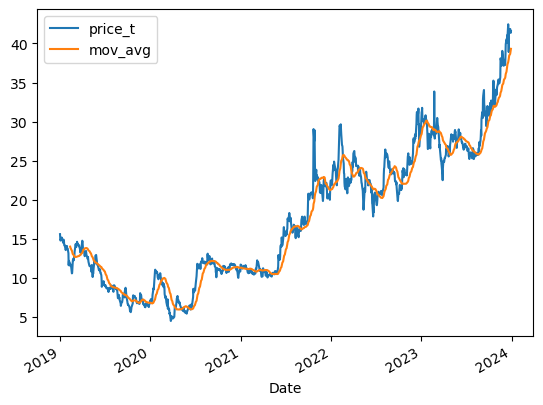

In [23]:
irb[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [24]:
irb['Log_Ret'] = np.log(irb['price_t'] / irb['price_t'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
irb['volatility'] = irb['Log_Ret'].rolling(window=30).std() * np.sqrt(30)


<Axes: xlabel='Date'>

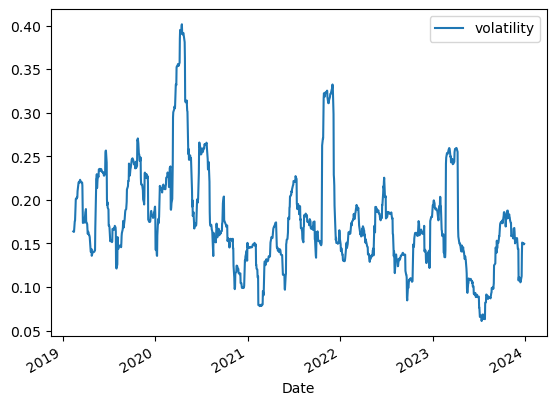

In [25]:
irb[['volatility']].plot()

### R SI (30-Day)

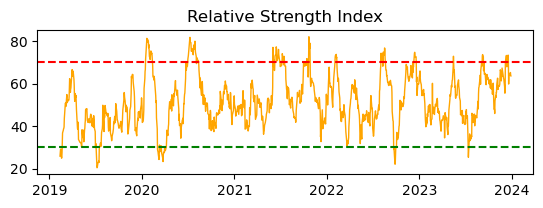

In [51]:
change = irb["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

### RVNL.NS

#### Loading Desired Data from Yahoo Finance.

In [34]:
rvnl = yf.download('RVNL.NS', start="2019-01-01", end="2023-12-30")
rvnl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-11,19.000000,19.799999,18.650000,19.049999,15.901788,89144982
2019-04-12,19.299999,19.900000,19.200001,19.750000,16.486109,29799546
2019-04-15,20.000000,23.700001,19.900000,23.650000,19.741589,80684771
2019-04-16,24.500000,26.950001,24.200001,25.600000,21.369331,98193853
2019-04-18,26.350000,26.850000,25.150000,26.150000,21.828440,49134384


#### Cleaning Process.

In [35]:
rvnl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1167 entries, 2019-04-11 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1167 non-null   float64
 1   High       1167 non-null   float64
 2   Low        1167 non-null   float64
 3   Close      1167 non-null   float64
 4   Adj Close  1167 non-null   float64
 5   Volume     1167 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.8 KB


In [36]:
rvnl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1.167000e+03
mean,48.332819,49.323008,47.378449,48.229777,45.875499,1.226112e+07
std,42.491584,43.449256,41.611036,42.427650,43.435498,2.522678e+07
min,10.650000,11.750000,10.000000,11.000000,9.216994,0.000000e+00
25%,24.000000,24.350000,23.625000,23.875000,20.067913,2.659138e+06
50%,30.900000,31.250000,30.450001,30.750000,28.376804,5.302937e+06
75%,39.700001,41.025000,38.725000,39.700001,38.681173,1.095163e+07
max,196.500000,199.250000,182.949997,189.500000,189.087418,3.958005e+08


In [37]:
rvnl.rename(columns={"Adj Close": "price_t"}, inplace=True)
rvnl.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-04-11,19.000000,19.799999,18.650000,19.049999,15.901788,89144982
2019-04-12,19.299999,19.900000,19.200001,19.750000,16.486109,29799546
2019-04-15,20.000000,23.700001,19.900000,23.650000,19.741589,80684771
2019-04-16,24.500000,26.950001,24.200001,25.600000,21.369331,98193853
2019-04-18,26.350000,26.850000,25.150000,26.150000,21.828440,49134384


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [38]:
rvnl['daily_returns']=rvnl["price_t"].pct_change()
rvnl

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-04-11,19.000000,19.799999,18.650000,19.049999,15.901788,89144982,NaN
2019-04-12,19.299999,19.900000,19.200001,19.750000,16.486109,29799546,0.036746
2019-04-15,20.000000,23.700001,19.900000,23.650000,19.741589,80684771,0.197468
2019-04-16,24.500000,26.950001,24.200001,25.600000,21.369331,98193853,0.082452
2019-04-18,26.350000,26.850000,25.150000,26.150000,21.828440,49134384,0.021484
...,...,...,...,...,...,...,...
2023-12-22,178.399994,178.699997,175.000000,176.899994,176.899994,8887707,-0.002818
2023-12-26,177.750000,180.500000,175.399994,178.649994,178.649994,9823977,0.009893
2023-12-27,179.350006,180.800003,176.550003,177.800003,177.800003,6991847,-0.004758


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

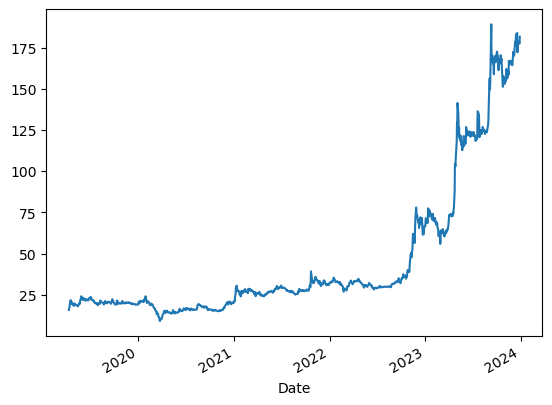

In [39]:
rvnl['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

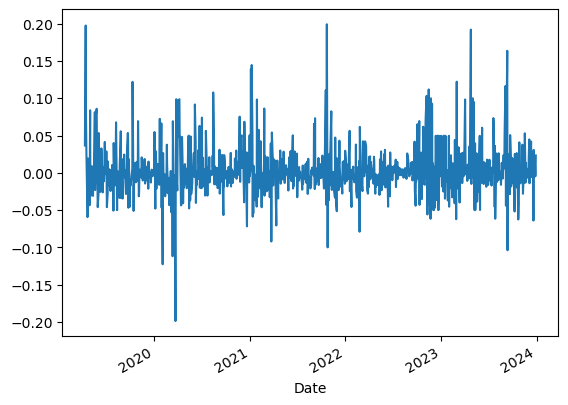

In [40]:
rvnl['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of RVNL is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average (30-day)

In [41]:
rvnl['mov_avg'] = rvnl['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

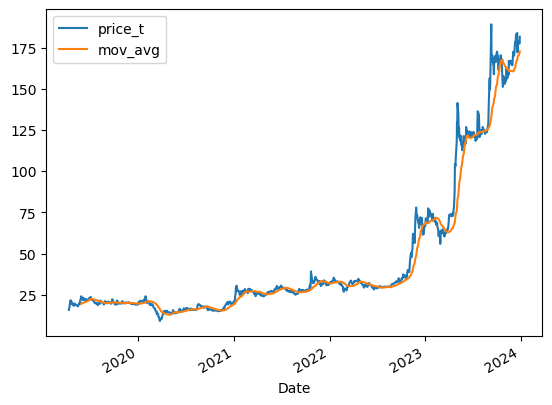

In [42]:
rvnl[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [43]:
rvnl['Log_Ret'] = np.log(rvnl['price_t'] / rvnl['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
rvnl['volatility'] = rvnl['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

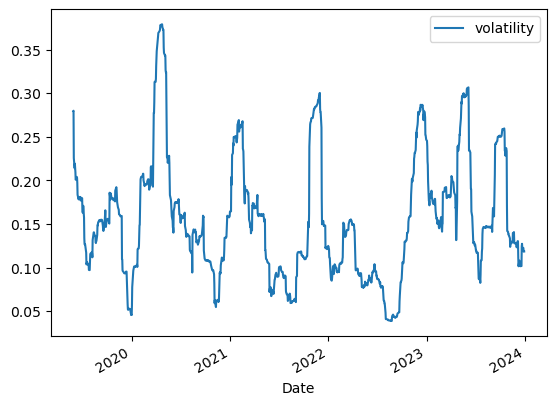

In [44]:
rvnl[['volatility']].plot()

### R SI (30-Day)

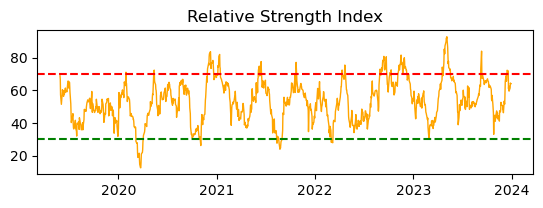

In [60]:
change = rvnl["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

### Larsen and Turbo limited.NS

#### Loading Desired Data from Yahoo Finance.

In [54]:
larsen = yf.download('LT.NS', start="2019-01-01", end="2023-12-30")
larsen.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1445.000000,1445.000000,1425.199951,1441.900024,1329.895874,786846
2019-01-02,1441.000000,1444.900024,1417.099976,1425.500000,1314.769653,2058504
2019-01-03,1426.000000,1429.000000,1391.000000,1395.000000,1286.638672,2290756
2019-01-04,1401.900024,1407.599976,1373.550049,1388.050049,1280.228516,2711485
2019-01-07,1397.000000,1408.599976,1379.050049,1383.800049,1276.308838,1851513


#### Cleaning Process.

In [56]:
larsen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [57]:
larsen.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1677.539189,1695.703561,1659.016602,1676.602430,1636.178854,3.075359e+06
std,567.405242,571.050322,565.166875,568.952128,590.851329,2.193669e+06
min,697.200012,755.750000,661.000000,707.900024,670.619568,0.000000e+00
25%,1327.349976,1340.424988,1313.000000,1325.200012,1242.511108,1.733160e+06
50%,1547.949951,1566.900024,1528.699951,1547.949951,1485.125732,2.396206e+06
75%,1952.500000,1975.750000,1943.025024,1956.775024,1944.783325,3.698040e+06
max,3545.000000,3559.949951,3504.149902,3544.000000,3544.000000,2.115335e+07


In [58]:
larsen.rename(columns={"Adj Close": "price_t"}, inplace=True)
larsen.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,1445.000000,1445.000000,1425.199951,1441.900024,1329.895874,786846
2019-01-02,1441.000000,1444.900024,1417.099976,1425.500000,1314.769653,2058504
2019-01-03,1426.000000,1429.000000,1391.000000,1395.000000,1286.638672,2290756
2019-01-04,1401.900024,1407.599976,1373.550049,1388.050049,1280.228516,2711485
2019-01-07,1397.000000,1408.599976,1379.050049,1383.800049,1276.308838,1851513


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [59]:
larsen['daily_returns']=larsen["price_t"].pct_change()
larsen

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,1445.000000,1445.000000,1425.199951,1441.900024,1329.895874,786846,NaN
2019-01-02,1441.000000,1444.900024,1417.099976,1425.500000,1314.769653,2058504,-0.011374
2019-01-03,1426.000000,1429.000000,1391.000000,1395.000000,1286.638672,2290756,-0.021396
2019-01-04,1401.900024,1407.599976,1373.550049,1388.050049,1280.228516,2711485,-0.004982
2019-01-07,1397.000000,1408.599976,1379.050049,1383.800049,1276.308838,1851513,-0.003062
...,...,...,...,...,...,...,...
2023-12-22,3424.000000,3496.000000,3408.600098,3477.949951,3477.949951,1681707,0.015712
2023-12-26,3477.949951,3508.350098,3477.949951,3490.050049,3490.050049,1072263,0.003479
2023-12-27,3510.000000,3549.000000,3504.149902,3544.000000,3544.000000,1389266,0.015458


<Axes: xlabel='Date'>

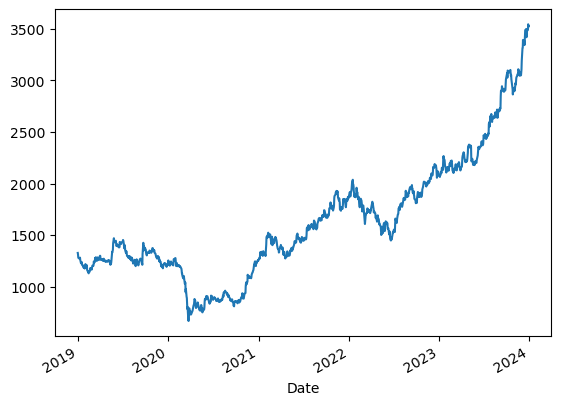

In [60]:
larsen['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

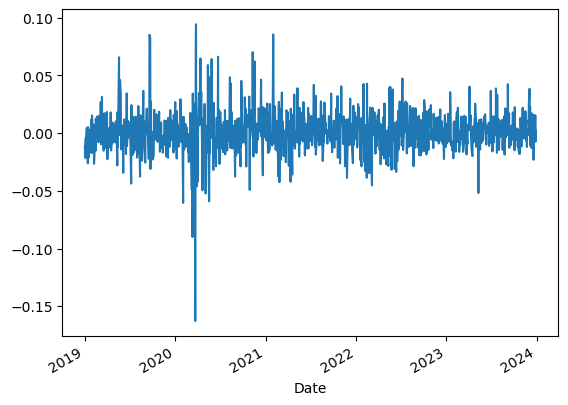

In [61]:
larsen['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of LT is in the downtrend in early 2020  and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average

In [62]:
larsen['mov_avg'] = larsen['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

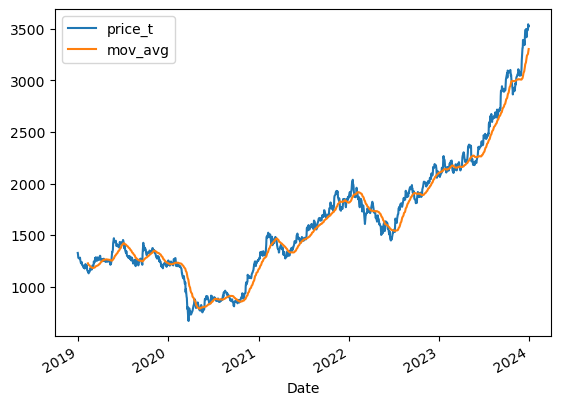

In [63]:
larsen[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [65]:
larsen['Log_Ret'] = np.log(larsen['price_t'] / larsen['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
larsen['volatility'] = larsen['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

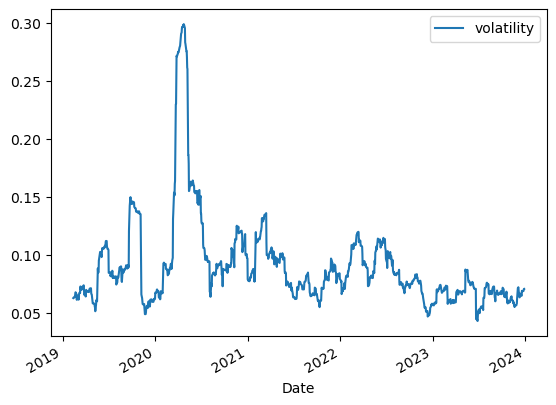

In [66]:
larsen[['volatility']].plot()

## R SI (30 - Day)

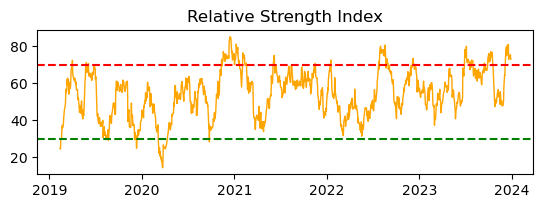

In [73]:
change = larsen["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')